In [5]:
import pandas as pd
import os
import plotly

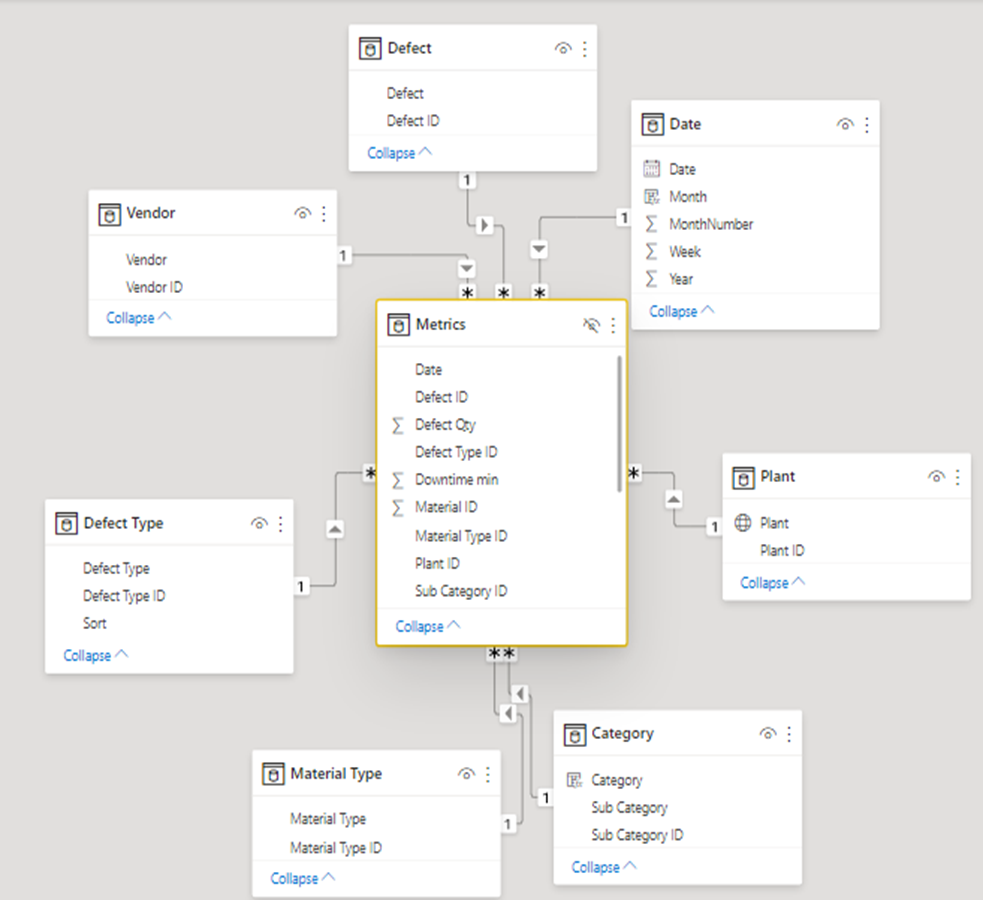

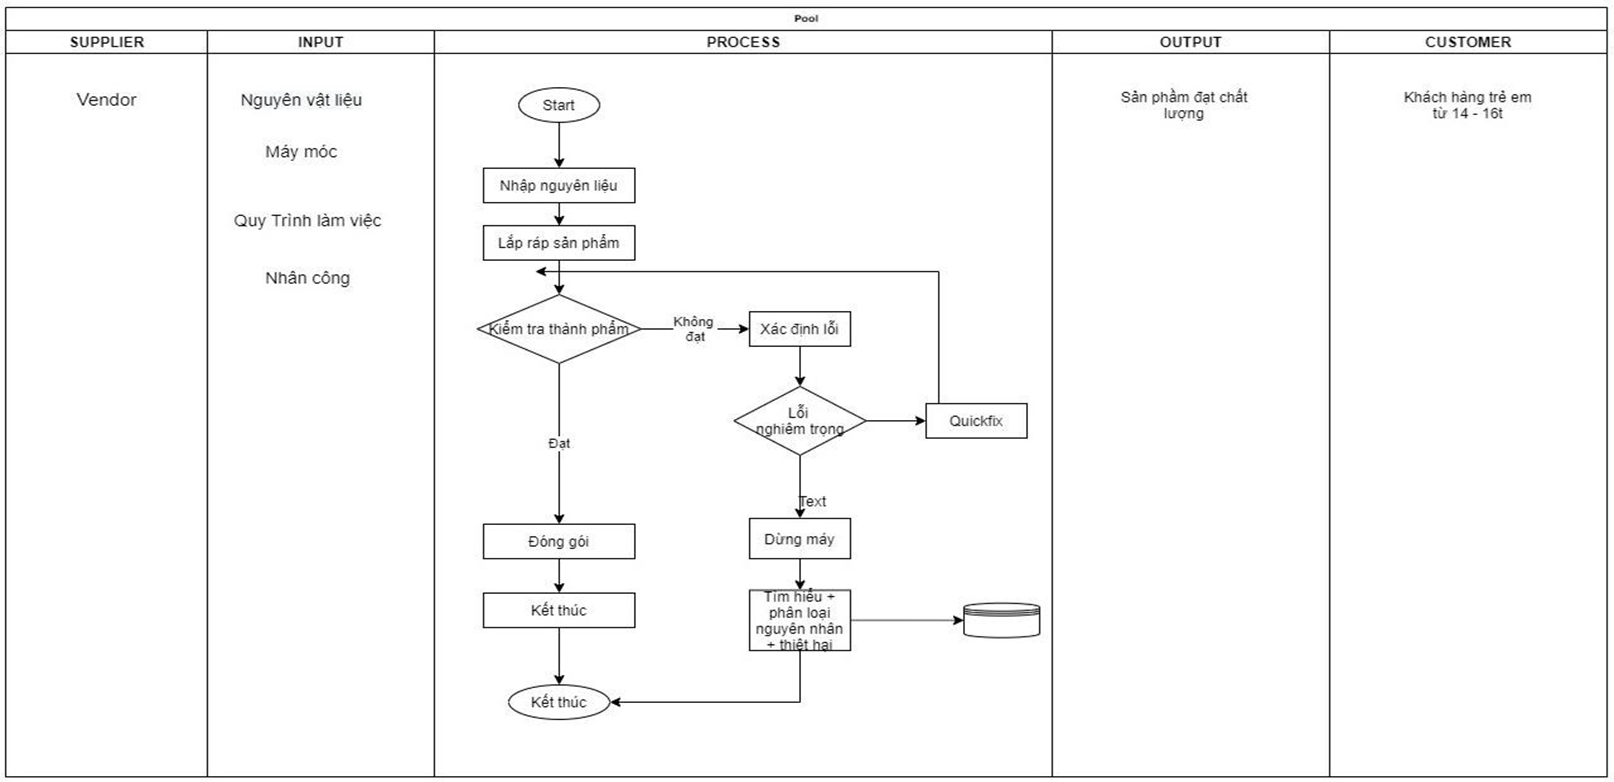

In [32]:
Defect_type = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Defect Type')
Defect = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Defect')
Material_Type = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Material Type')
Metrics = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Metrics')
Plant = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Plant')
Category = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Plant')
Vendor = pd.read_excel(r"C:\Users\hieudd\Downloads\Supplier_rawdata.xlsx", sheet_name='Vendor')

- Tình hình downtime diễn ra như thế nào

In [33]:
Metrics[Metrics.duplicated()==True]

,Date,Sub Category ID,Plant ID,Vendor ID,Material ID,Defect Type ID,Material Type ID,Defect ID,Defect Qty,Downtime (min)
1,2014-12-31,2.0,16.0,2.0,2126.0,3.0,4.0,27.0,0.0,60.0
117,2014-12-15,3.0,4.0,17.0,608.0,1.0,13.0,289.0,0.0,0.0
118,2014-12-15,3.0,4.0,17.0,608.0,1.0,13.0,289.0,0.0,0.0
119,2014-12-15,3.0,4.0,17.0,608.0,1.0,13.0,289.0,0.0,0.0
229,2014-12-01,4.0,22.0,321.0,2083.0,1.0,9.0,69.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5843,2013-02-09,4.0,19.0,118.0,588.0,1.0,9.0,78.0,0.0,0.0
5975,2013-01-23,3.0,4.0,1.0,9.0,1.0,1.0,15.0,0.0,0.0
5996,2013-01-18,4.0,23.0,42.0,500.0,4.0,9.0,64.0,20720.0,0.0
5998,2013-01-18,4.0,23.0,89.0,384.0,4.0,9.0,64.0,22250.0,0.0


In [34]:
Metrics.drop_duplicates(inplace=True)
Metrics.reset_index(drop=True,inplace=True)
Metrics


,Date,Sub Category ID,Plant ID,Vendor ID,Material ID,Defect Type ID,Material Type ID,Defect ID,Defect Qty,Downtime (min),Year,Month
0,2014-12-31,2.0,16.0,2.0,2126.0,3.0,4.0,27.0,0.0,60.0,2014,12
1,2014-12-31,2.0,16.0,2.0,2137.0,3.0,6.0,281.0,1.0,60.0,2014,12
2,2014-12-31,2.0,20.0,59.0,1439.0,3.0,8.0,295.0,9.0,10.0,2014,12
3,2014-12-31,2.0,2.0,46.0,607.0,3.0,8.0,299.0,47.0,30.0,2014,12
4,2014-12-31,1.0,1.0,16.0,1824.0,3.0,3.0,90.0,20009.0,218.0,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5947,2013-01-01,1.0,1.0,102.0,446.0,4.0,17.0,185.0,80.0,0.0,2013,1
5948,2013-01-01,1.0,1.0,101.0,441.0,4.0,17.0,183.0,102.0,0.0,2013,1
5949,2013-01-01,3.0,4.0,17.0,151.0,1.0,13.0,95.0,0.0,0.0,2013,1
5950,2013-01-01,3.0,4.0,17.0,151.0,1.0,13.0,105.0,0.0,0.0,2013,1


In [53]:
Metrics_D = Metrics.groupby(['Date']).agg(Downtime_day = ('Downtime (min)','sum')).reset_index()
Metrics_D['MA'] = Metrics_D['Downtime_day'].ewm(span=5, adjust=True).mean()
Metrics_D

,Date,Downtime_day,MA
0,2013-01-01,640.0,640.000000
1,2013-01-02,0.0,256.000000
2,2013-01-03,31.0,149.421053
3,2013-01-04,190.0,166.276923
4,2013-01-07,95.0,138.914692
...,...,...,...
596,2014-12-25,105.0,455.232868
597,2014-12-28,0.0,303.488579
598,2014-12-29,786.0,464.325719
599,2014-12-30,520.0,482.883813


In [ ]:
Metrics_M = Metrics_D.groupby(['Year','Month']).agg('')

In [7]:
Metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6145 entries, 0 to 6144
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              6145 non-null   datetime64[ns]
 1   Sub Category ID   6145 non-null   float64       
 2   Plant ID          6145 non-null   float64       
 3   Vendor ID         6145 non-null   float64       
 4   Material ID       6145 non-null   float64       
 5   Defect Type ID    6145 non-null   float64       
 6   Material Type ID  6145 non-null   float64       
 7   Defect ID         6145 non-null   float64       
 8   Defect Qty        6145 non-null   float64       
 9   Downtime (min)    6145 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 480.2 KB


In [52]:

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=Metrics_D['Date'], 
               y=Metrics_D['MA'], 
               mode="lines+markers", 
               marker_color='rgb(11, 189, 29)'),
    secondary_y=True
)

fig.show()
